# Issues DTW

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn import metrics
import os
from sklearn.preprocessing import normalize

In [6]:
is_files = [file for file in os.listdir() if 'cleaned.pk1' in file]
is_files

['embulk_issues_cleaned.pk1',
 'google_issues_cleaned.pk1',
 'iven_issues_cleaned.pk1',
 'microsoft_issues_cleaned.pk1',
 'oleiade_issues_cleaned.pk1',
 'pandas_issues_cleaned.pk1',
 'yang_issues_cleaned.pk1',
 'zhn_issues_cleaned.pk1']

In [7]:
# Check shape
for file in is_files:
    print(file, pd.read_pickle(file).shape)

embulk_issues_cleaned.pk1 (391, 11)
google_issues_cleaned.pk1 (192, 11)
iven_issues_cleaned.pk1 (8, 11)
microsoft_issues_cleaned.pk1 (2, 11)
oleiade_issues_cleaned.pk1 (151, 11)
pandas_issues_cleaned.pk1 (15572, 11)
yang_issues_cleaned.pk1 (76, 11)
zhn_issues_cleaned.pk1 (10, 11)


In [8]:
embulk = pd.read_pickle(is_files[0])
google = pd.read_pickle(is_files[1])
iven = pd.read_pickle(is_files[2])
microsoft = pd.read_pickle(is_files[3])
oleiade = pd.read_pickle(is_files[4])
pandas = pd.read_pickle(is_files[5])
yang = pd.read_pickle(is_files[6])
zhn = pd.read_pickle(is_files[7])

# Monthly Count

In [9]:
def monthly_count(df):
    
    # Change to pandas datetime object
    df['createdAt'] =  df['createdAt'].apply(pd.Timestamp)
    df['closedAt'] =  df['closedAt'].apply(pd.Timestamp)
    
    # Group by committedDate's month and get the count
    df_group = df.groupby(df['createdAt'].dt.to_period('M')) \
                                                 .count()['number'] \
                                                 .reset_index() \
                                                 .rename(columns={'number': 'countByMonth'})
    
    # Normalize count and create a insert back into df_group
    df_group['countByMonthNorm'] = normalize([df_group['countByMonth']])[0]
    
    return df_group

In [10]:
embulk_is = monthly_count(embulk)
google_is = monthly_count(google)
iven_is = monthly_count(iven)
microsoft_is = monthly_count(microsoft)
oleiade_is = monthly_count(oleiade)
pandas_is = monthly_count(pandas)
yang_is = monthly_count(yang)
zhn_is = monthly_count(zhn)

C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Convertin

In [11]:
embulk_is.head()

,createdAt,countByMonth,countByMonthNorm
0,2015-01,33,0.471573
1,2015-02,14,0.200061
2,2015-03,17,0.242932
3,2015-04,7,0.100031
4,2015-05,4,0.057160


# Dynamic Time Warping

In [12]:
from tslearn.metrics import dtw_path

In [13]:
monthly_issues_list = [embulk_is, google_is, iven_is, microsoft_is, oleiade_is, pandas_is, yang_is, zhn_is]
monthly_issues_list_str = ['embulk_is', 'google_is', 'iven_is', 'microsoft_is', 'oleiade_is', 'pandas_is', 'yang_is', 'zhn_is']

### Calculate DTW

In [14]:
def calc_dtw(issue_num):
    dtw = []
    path = []

    for el in range(len(monthly_issues_list)):
        dtw_pathing = dtw_path(monthly_issues_list[issue_num].iloc[:,-1].tolist(), monthly_issues_list[el].iloc[:,-1].tolist())
        dtw.append((monthly_issues_list_str[issue_num], monthly_issues_list_str[el], dtw_pathing[1]))
        path.append((monthly_issues_list_str[issue_num], monthly_issues_list_str[el], dtw_pathing[0]))
        
    return dtw, path

In [15]:
dtw_1, path_1 = calc_dtw(0)

In [16]:
dtw_1

[('embulk_is', 'embulk_is', 0.0),
 ('embulk_is', 'google_is', 0.5661471849615578),
 ('embulk_is', 'iven_is', 1.6385979833584619),
 ('embulk_is', 'microsoft_is', 4.593276369776361),
 ('embulk_is', 'oleiade_is', 0.6483355485097747),
 ('embulk_is', 'pandas_is', 0.7380414234435854),
 ('embulk_is', 'yang_is', 0.5519480528454341),
 ('embulk_is', 'zhn_is', 1.0505855953935168)]

### Plot DTW

In [17]:
def plot_graph(dtw, num_dtw, issue_num):
    print(dtw[issue_num])
    monthly_issues_list[num_dtw].plot(x='createdAt', y='countByMonthNorm')
    monthly_issues_list[issue_num].plot(x='createdAt', y='countByMonthNorm')

('embulk_is', 'oleiade_is', 0.6483355485097747)


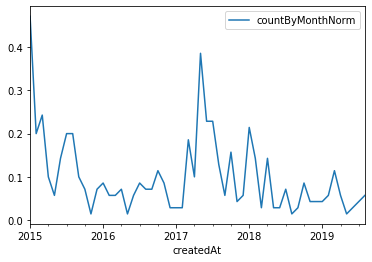

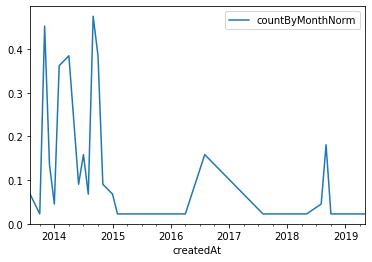

In [18]:
plot_graph(dtw_1, 0, 4)

### Make Dictionary

In [19]:
def make_dict(num):
    
    dtw_1, path_1 = calc_dtw(num)
    my_dict = {dtw_1[i][1]:dtw_1[i][2] for i in range(len(dtw_1))}
    
    return my_dict

In [20]:
embulk_dict = make_dict(0)
google_dict = make_dict(1)
iven_dict = make_dict(2)
microsoft_dict = make_dict(3)
oleiade_dict = make_dict(4)
pandas_dict = make_dict(5)
yang_dict = make_dict(6)
zhn_dict = make_dict(7)

dict_list = [embulk_dict, google_dict, iven_dict, microsoft_dict, oleiade_dict, 
             pandas_dict, yang_dict, zhn_dict]

### Make DF

In [22]:
df = pd.Series()
for el in range(len(dict_list)):
    df = pd.concat([df, pd.Series(dict_list[el], name=monthly_issues_list_str[el])], axis=1)
df = df.drop(columns=0)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df

,embulk_is,google_is,iven_is,microsoft_is,oleiade_is,pandas_is,yang_is,zhn_is
embulk_is,0.000000,0.566147,1.638598,4.593276,0.648336,0.738041,0.551948,1.050586
google_is,0.566147,0.000000,1.630804,4.564237,0.428634,0.619523,0.449573,1.304364
iven_is,1.638598,1.630804,0.000000,0.856746,1.185973,2.157744,1.233914,0.694430
microsoft_is,4.593276,4.564237,0.856746,0.000000,3.027845,6.365521,3.457908,1.055106
oleiade_is,0.648336,0.428634,1.185973,3.027845,0.000000,0.703669,0.518565,1.134140
pandas_is,0.738041,0.619523,2.157744,6.365521,0.703669,0.000000,0.696306,1.505004
yang_is,0.551948,0.449573,1.233914,3.457908,0.518565,0.696306,0.000000,1.155607
zhn_is,1.050586,1.304364,0.694430,1.055106,1.134140,1.505004,1.155607,0.000000


In [24]:
df.to_csv('issues_dtw.csv', index=False)

# [Hiearchical Clustering](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


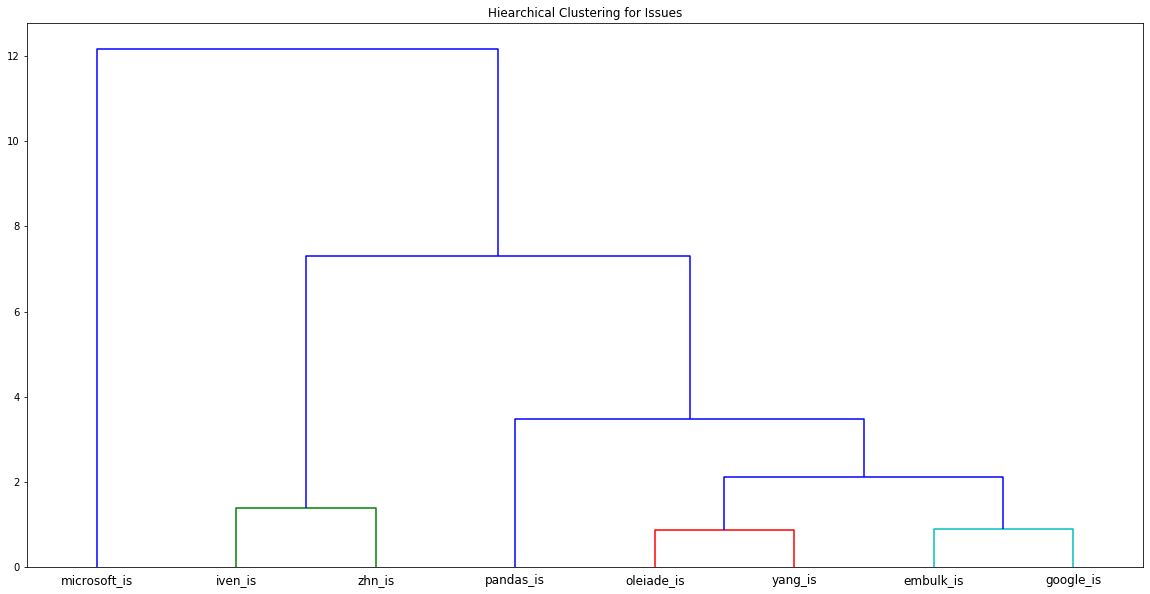

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df.as_matrix(), 'ward')
labelList = df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering for Issues')
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=1.5)
plt.show()

# [Agglomerative Clustering](https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Dustin\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


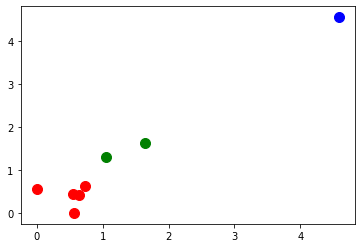

In [36]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

X = df.as_matrix()

y = hc.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')

In [35]:
y

array([0, 0, 2, 3, 0, 1, 0, 2], dtype=int64)

In [33]:
df.columns

Index(['embulk_is', 'google_is', 'iven_is', 'microsoft_is', 'oleiade_is',
       'pandas_is', 'yang_is', 'zhn_is'],
      dtype='object')